# Desafío: Gráficos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('qog_std_cs_jan18.csv')



## 1. Genere una submuestra de casos

* Utilice los últimos 4 dígitos de su rut como semilla pseudoaleatoria: 8947

In [2]:
seed = 8947
np.random.seed(seed)



* Seleccione el 50% de los casos

In [3]:
df.shape



(194, 1882)

In [4]:
half_df = df.sample(frac=0.5, random_state=seed)
print(half_df.shape)
half_df.head()



(97, 1882)


,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
133,598,Papua New Guinea,PNG,910.0,598.0,QoGStdCSJan18,NaN,NaN,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,862,Venezuela,VEN,101.0,862.0,QoGStdCSJan18,NaN,NaN,20.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,148,Chad,TCD,483.0,148.0,QoGStdCSJan18,NaN,NaN,20.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,554,New Zealand,NZL,920.0,554.0,QoGStdCSJan18,60.0,209597120.0,NaN,NaN,...,1.70227,2.014865,1.81931,6.881995,7.648975,4.909091,4.146135,1.259925,0.371845,0.567766
88,404,Kenya,KEN,501.0,404.0,QoGStdCSJan18,NaN,NaN,27.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Cada base generada debe contener los siguientes elementos:
    * El índice de desarrollo humano (undp_hdi)
    * El nombre del país (ccodealp)
	* La región a la que pertenece (ht_region)
	* El PIB per capita. (gle_cgdpc)
	* El total de la población (imf_pop)

* Si su apellido está entre la N y la Z, escoja las siguientes variables del módulo Salud:
	* ``` wef_imort```: Infant mortality, deaths/1000 live births
	* ```who_alc2000```: Alcohol consumption per capita (2000-)
	* ```who_tobt```: Current smoking of any tobacco product (Total).
	* ```wdi_exph```: Government expenditure on health, total (% of GDP)

* Guarde esta tabla procesada en un nuevo objecto
* Renombre las categorías de la variable ```ht_region``` de números a regiones

### Apellido: Porras

In [5]:
basic_columns = ['undp_hdi', 'ccodealp', 'ht_region', 'gle_cgdpc', 'imf_pop']
group_columns =  ['wef_imort', 'who_alc2000', 'who_tobt', 'wdi_exph']
columns = basic_columns + group_columns
db_df = half_df.loc[:, columns].copy()
db_df.head()




,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
133,0.515,PNG,9,1693.540,6.880000,NaN,0.88,NaN,4.263571
190,0.769,VEN,2,10513.960,NaN,13.100000,6.47,NaN,5.256702
34,0.394,TCD,4,1651.050,NaN,89.400002,0.64,NaN,3.621164
123,0.913,NZL,5,26481.369,4.555000,4.700000,9.07,17.6,11.029610
88,0.550,KEN,4,1494.630,40.700001,48.700001,1.84,13.6,5.720291


In [6]:
db_df['ht_region'] = db_df['ht_region'].replace(
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    ['EastEurope', 'LatAm', 'NorthAfrica', 'SubSaharian',
      'WesternDem', 'EastAsia', 'SouthEastAsia', 'SouthAsia', 'Pacific', 'Caribbean'
    ]
)
db_df.head()



,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
133,0.515,PNG,Pacific,1693.540,6.880000,NaN,0.88,NaN,4.263571
190,0.769,VEN,LatAm,10513.960,NaN,13.100000,6.47,NaN,5.256702
34,0.394,TCD,SubSaharian,1651.050,NaN,89.400002,0.64,NaN,3.621164
123,0.913,NZL,WesternDem,26481.369,4.555000,4.700000,9.07,17.6,11.029610
88,0.550,KEN,SubSaharian,1494.630,40.700001,48.700001,1.84,13.6,5.720291


##  2. Genere una función que ingrese su objeto y devuelva:

* Por cada variable existente en su objeto, calcule las medidas descriptivas para los casos contínuos
* Para cada variable discreta, que calcule la frecuencia.
* Reporte las estadísticas descriptivas para ```gle_cgdpc```, ```undp_hdi```, ```imf_pop```.

Compare las estadísticas con algún compañero. ¿Ve alguna diferencia substancial en alguna de ellas?

In [7]:
def desafio_2(data_frame):
    for label, serie in data_frame.iteritems():
        print("********************************")
        print(label)
        if serie.dtype == 'object':
            print(serie.value_counts())
        elif serie.dtype == 'float64':
            print(serie.describe())
            
            

In [8]:
desafio_2(db_df)




********************************
undp_hdi
count    93.000000
mean      0.699839
std       0.159257
min       0.351000
25%       0.565000
50%       0.741000
75%       0.805000
max       0.948000
Name: undp_hdi, dtype: float64
********************************
ccodealp
TUR    1
KAZ    1
GEO    1
THA    1
PAN    1
POL    1
TCD    1
SMR    1
QAT    1
HND    1
IRN    1
ROU    1
IRQ    1
TUV    1
BEL    1
SRB    1
SYR    1
NZL    1
SAU    1
TLS    1
HRV    1
SUR    1
AND    1
JPN    1
VEN    1
PNG    1
BRN    1
ITA    1
CPV    1
SGP    1
      ..
MKD    1
BGD    1
MDV    1
GHA    1
BTN    1
AUS    1
NER    1
MCO    1
MAR    1
IRL    1
NOR    1
EST    1
SOM    1
WSM    1
ECU    1
BDI    1
KEN    1
CUB    1
RWA    1
MLI    1
LBR    1
MDA    1
ARM    1
ZAF    1
ARE    1
UKR    1
BIH    1
TZA    1
LBN    1
ISR    1
Name: ccodealp, Length: 97, dtype: int64
********************************
ht_region
SubSaharian      22
EastEurope       17
WesternDem       13
NorthAfrica      13
LatAm             8


In [9]:
db_df.describe()




,undp_hdi,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
count,93.000000,97.000000,74.000000,79.000000,93.000000,66.000000,96.000000
mean,0.699839,15661.311846,26.962365,22.064557,4.497312,22.978788,6.620259
std,0.159257,20232.171833,43.829726,21.256492,3.821565,8.995221,2.655983
min,0.351000,332.269990,0.011000,1.700000,0.000000,4.700000,1.475303
25%,0.565000,2223.010000,3.077250,5.700000,0.970000,16.324999,4.853159
50%,0.741000,8507.650400,7.689500,14.200000,3.820000,23.100001,6.364770
75%,0.805000,19990.939000,32.125999,33.750000,7.550000,29.550000,7.862662
max,0.948000,108481.130000,252.164993,89.400002,12.600000,42.099998,16.536638


In [10]:
db_df['gle_cgdpc'].describe()



count        97.000000
mean      15661.311846
std       20232.171833
min         332.269990
25%        2223.010000
50%        8507.650400
75%       19990.939000
max      108481.130000
Name: gle_cgdpc, dtype: float64

In [11]:
db_df['undp_hdi'].describe()



count    93.000000
mean      0.699839
std       0.159257
min       0.351000
25%       0.565000
50%       0.741000
75%       0.805000
max       0.948000
Name: undp_hdi, dtype: float64

In [12]:
db_df['imf_pop'].describe()



count     74.000000
mean      26.962365
std       43.829726
min        0.011000
25%        3.077250
50%        7.689500
75%       32.125999
max      252.164993
Name: imf_pop, dtype: float64

Hice las comparaciones con un compañero y los valores varian un poco, en el caso de la media las variaciones son en la tercera decima.

## 3. Genere una función que liste las observaciones perdidas de una variable

* La función debe contener los siguientes argumentos:
	* ```dataframe```: La función debe ingresar un objeto DataFrame.
	* ```var```: Variable a inspeccionar.
	* ```print_list```: Opción para imprimir la lista de observaciones perdidas en la variable.
    
    Debe ser ```False``` por defecto.
* La función debe retornar la cantidad de casos perdidos y el porcentaje correspondiente.
* Cuando ```print_list = True```, debe retornar la lista de casos.
* Analice todas las variables y sus casos perdidos.

    Para las 3 variables con un mayor porcentaje de casos perdidos, solicite la lista de países con ausencia de datos

In [13]:
def desafio_3(dataframe, var, print_list=False):
    if print_list :
        return dataframe[dataframe[var].isna()]
    else:
        null_count = dataframe[var].isnull().sum()
        dataframe_len = len(dataframe)
        return (null_count, null_count/dataframe_len)
    


In [14]:
desafio_3(db_df, 'imf_pop', True)




,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
190,0.769,VEN,LatAm,10513.96000,NaN,13.100000,6.470000,NaN,5.256702
34,0.394,TCD,SubSaharian,1651.05000,NaN,89.400002,0.640000,NaN,3.621164
26,0.406,BDI,SubSaharian,663.57001,NaN,66.900002,4.160000,NaN,7.535565
139,0.421,GNB,SubSaharian,961.26001,NaN,NaN,3.570000,NaN,5.593137
97,0.427,LBR,SubSaharian,488.26999,NaN,53.599998,3.720000,14.200000,10.036333
175,0.836,ARE,NorthAfrica,20310.10900,NaN,7.200000,1.910000,NaN,3.643986
145,0.762,KNA,Caribbean,11237.75000,NaN,NaN,8.680000,NaN,5.080365
169,0.553,SYR,NorthAfrica,4284.41990,NaN,14.200000,0.760000,NaN,3.254531
3,0.857,AND,WesternDem,32367.33000,NaN,NaN,9.979999,33.099998,8.127135
72,0.490,HTI,LatAm,1024.93990,NaN,56.500000,5.680000,11.800000,7.555654


In [15]:
desafio_3(db_df, 'imf_pop')




(23, 0.23711340206185566)

In [16]:
columns



['undp_hdi',
 'ccodealp',
 'ht_region',
 'gle_cgdpc',
 'imf_pop',
 'wef_imort',
 'who_alc2000',
 'who_tobt',
 'wdi_exph']

In [17]:
for variable in columns:
    print(variable)
    print(desafio_3(db_df, variable, False))
    


undp_hdi
(4, 0.041237113402061855)
ccodealp
(0, 0.0)
ht_region
(0, 0.0)
gle_cgdpc
(0, 0.0)
imf_pop
(23, 0.23711340206185566)
wef_imort
(18, 0.18556701030927836)
who_alc2000
(4, 0.041237113402061855)
who_tobt
(31, 0.31958762886597936)
wdi_exph
(1, 0.010309278350515464)


### Las variables con mayor porcentaje de datos perdidos son:
* ```who_tobt```: con un ```31%``` de datos perdidos
* ```imf_pop```: con un ```23%``` de datos perdidos
* ```wef_imort```: con un ```18%``` de datos perdidos




In [18]:
print("Lista de paises con ausencia de datos de la variable who_tobt:")
db_df[db_df['who_tobt'].isna()]['ccodealp']


Lista de paises con ausencia de datos de la variable who_tobt:


133    PNG
190    VEN
34     TCD
9      AUT
26     BDI
139    GNB
105    MDV
174    TTO
175    ARE
114    MNE
145    KNA
169    SYR
179    TUV
144    RWA
182    MKD
165    SUR
159    SOM
141    QAT
140    TLS
79     IRQ
149    STP
111    MCO
91     KWT
146    LCA
70     GIN
148    SMR
63     GMB
5      ATG
60     DJI
16     BTN
52     SLV
Name: ccodealp, dtype: object

In [19]:
print("Lista de paises con ausencia de datos de la variable imf_pop")
db_df[db_df['imf_pop'].isna()]['ccodealp']



Lista de paises con ausencia de datos de la variable imf_pop


190    VEN
34     TCD
26     BDI
139    GNB
97     LBR
175    ARE
145    KNA
169    SYR
3      AND
72     HTI
73     HND
44     CUB
125    NER
159    SOM
149    STP
111    MCO
63     GMB
65     GHA
5      ATG
60     DJI
36     CHN
151    SEN
52     SLV
Name: ccodealp, dtype: object

In [20]:
print("Lista de paises con auscencia de datos de la variable wef_imort")
db_df[db_df['wef_imort'].isna()]['ccodealp']



Lista de paises con auscencia de datos de la variable wef_imort


133    PNG
57     FJI
139    GNB
105    MDV
145    KNA
3      AND
179    TUV
44     CUB
125    NER
159    SOM
191    WSM
79     IRQ
149    STP
111    MCO
146    LCA
148    SMR
5      ATG
60     DJI
Name: ccodealp, dtype: object

## 4. Grafique los histogramas

* Genere una función que grafique un histograma en conjunto y señale las medias.
* La función debe incluír los siguientes argumentos:
	* ```dataframe```: La base de datos donde se encuentran los datos específicos.
	* ```var```: La variable a graficar.
	* ```sample_mean```: Booleano. Si es verdadero, debe generar una recta vertical indicando la media de la variable en la selección muestral. Por defecto debe ser ```False```.
	* ```true_mean```: Booleano. Si es verdadero, debe generar una recta vertical indicando la media de variable en la base de datos completa.
* Implemente las funciones para las 4 variables seleccionadas según su grupo.
  
  ¿En qué variables la media de la submuestra es mayor a la de la muestra completa?

In [21]:
def desafio_4(dataframe, var, sample_mean=False, true_mean=False):
    var_drop = dataframe[var].dropna()
    plt.hist(var_drop, color='lightgrey')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    if sample_mean:
        sample_var_mean = var_drop.mean()
        plt.axvline(sample_var_mean, lw=3, color='tomato', linestyle='--', label=f"S. Mean ({round(sample_var_mean, 4)}%)")
    if true_mean:
        true_var_mean = df[var].dropna().mean()
        plt.axvline(true_var_mean, lw=3, color='blue', linestyle='--', label=f"T. Mean ({round(true_var_mean, 4)}%)")
    if sample_mean or true_mean:
        plt.legend()
    plt.show()



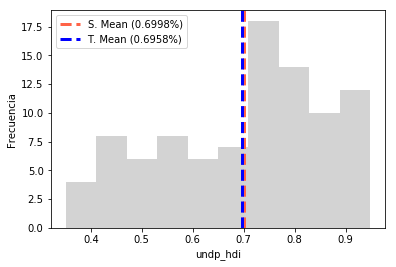

In [22]:
desafio_4(db_df, 'undp_hdi', True, True)



### Histograma para la variable wef_imort

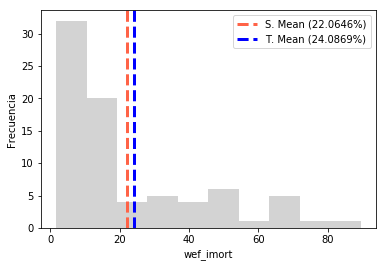

### Histograma para la variable who_alc2000

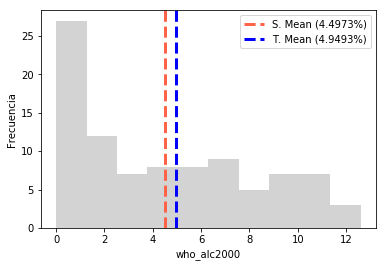

### Histograma para la variable who_tobt

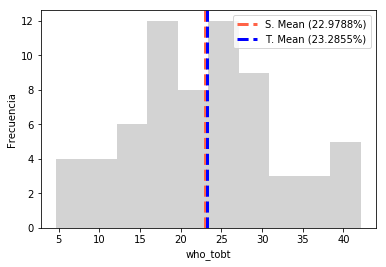

### Histograma para la variable wdi_exph

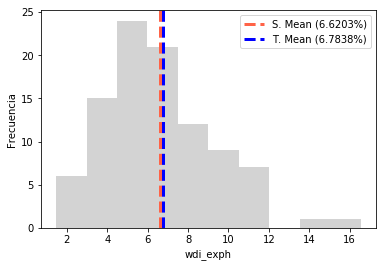

In [23]:
from IPython.display import display, Markdown
for variable in group_columns:
    display(Markdown(f"### Histograma para la variable {variable}"))
    desafio_4(db_df, variable, True, True)


In [24]:
display(Markdown(f"**Conclusión:** Para ninguna de las 4 variables de mi grupo ```({', '.join(map(str, group_columns))})``` la media de la muestra es mayor a la media poblacional"))


**Conclusión:** Para ninguna de las 4 variables de mi grupo ```(wef_imort, who_alc2000, who_tobt, wdi_exph)``` la media de la muestra es mayor a la media poblacional

## 5. Genere una función que devuelva un dotplot

* La función debe contener los siguientes argumentos como argumentos:
	* ```dataframe```: La tabla de datos donde buscar las variables.
	* ```plot_var```: La variable a analizar y extraer las medias.
	* ```plot_by```: La variable agrupadora.
	* ```global_stat```: Booleano. Si es True debe graficar la media global de la variable. Por defecto debe ser ```False```.
	* ```statistic```: Debe presentar dos opciones. mean para la media y median para la mediana.  Por defecto debe ser ```mean```.
* Implemente la función en las 3 variables con una menor cantidad de datos perdidos.

In [25]:
def desafio_5(dataframe, plot_var, plot_by, global_stat=False, statistic=['mean']):
    grouped_serie = dataframe.groupby(plot_by)[plot_var]
    for stat in statistic:
        if stat == 'mean':
            var_mean = dataframe[plot_var].mean()
            grouped_means = grouped_serie.mean()
            plt.plot(grouped_means.values, grouped_means.index, 'o')
            plt.axvline(var_mean, color='lightblue', linestyle='--', label=f"Mean ({round(var_mean, 2)}%)")
        elif stat == 'median':
            var_median = dataframe[plot_var].median()
            grouped_medians = grouped_serie.median()
            plt.plot(grouped_medians.values, grouped_medians.index, 'o')
            plt.axvline(var_median, color='lightgreen', linestyle='--', label=f"Median ({round(var_median, 2)}%)")
    if global_stat:
        global_var_mean = df[plot_var].mean()
        plt.axvline(global_var_mean, color='blue', linestyle='--', label=f"Global Mean ({round(global_var_mean, 2)}%)")
        if 'median' in statistic:
            global_var_median = df[plot_var].median()
            plt.axvline(global_var_median, color='green', linestyle='--', label=f"Global Median ({round(global_var_median, 2)}%)")
    plt.legend()
    plt.show()



Implemente la función en las 3 variables con una menor cantidad de datos perdidos.

In [26]:
for variable in columns:
    print(variable)
    print(db_df[variable].dtype)
    print(desafio_3(db_df, variable, False))
    print("\n")

undp_hdi
float64
(4, 0.041237113402061855)


ccodealp
object
(0, 0.0)


ht_region
object
(0, 0.0)


gle_cgdpc
float64
(0, 0.0)


imf_pop
float64
(23, 0.23711340206185566)


wef_imort
float64
(18, 0.18556701030927836)


who_alc2000
float64
(4, 0.041237113402061855)


who_tobt
float64
(31, 0.31958762886597936)


wdi_exph
float64
(1, 0.010309278350515464)




### Las variables con menor porcentaje de datos perdidos son:
* ```gle_cgdpc```: con un ```0%``` de datos perdidos
* ```wdi_exph```: con un ```1%``` de datos perdidos
* ```undp_hdi```: con un ```4%``` de datos perdidos

### Dotplot para la variable gle_cgdpc

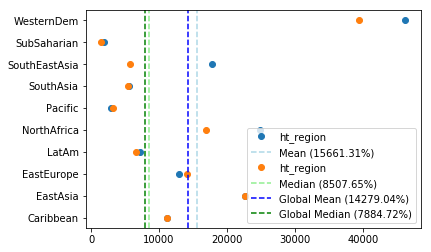

### Dotplot para la variable wdi_exph

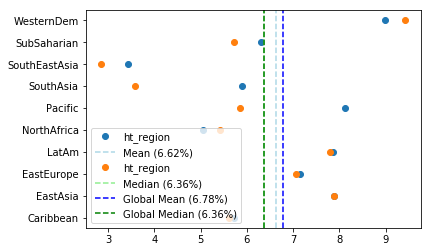

### Dotplot para la variable undp_hdi

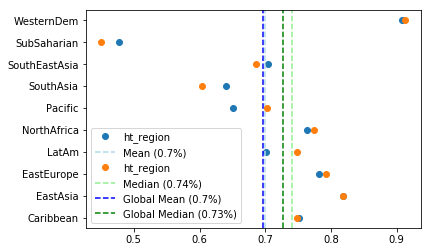

In [36]:
display(Markdown(f"### Dotplot para la variable gle_cgdpc"))
desafio_5(db_df, 'gle_cgdpc', 'ht_region', True, ['mean', 'median'])

display(Markdown(f"### Dotplot para la variable wdi_exph"))
desafio_5(db_df, 'wdi_exph', 'ht_region', True, ['mean', 'median'])

display(Markdown(f"### Dotplot para la variable undp_hdi"))
desafio_5(db_df, 'undp_hdi', 'ht_region', True, ['mean', 'median'])


## 6. Guarde la base de datos


* La submuestra creada tiene un método llamado to_csv.

  Acceda a éste y guarde la base de datos con la siguiente nomenclatura: ```subsample_<iniciales>_demo.csv```.

  (Súbala a la plataforma, junto al desafío)

In [35]:
db_df.to_csv('subsample_LAPP_demo.csv')